# ML Assignment 5

------

**1) Our task is to build a Logistic Regression based classification model that estimates an applicant's probability of getting admission to an institution based on the scores from those two examinations whose data have been provided.**

> (a) Design a Predictor with **two basic features** which are given using BGD, SGD and MBGD algorithms, **with and without feature scaling** and compare their performances.[Q1(a)](#Q1(a))

>(b) Inject more features from the data set  in the model **(at least 6-9)** and repeat (a).[Q1(b)](#Q1(b))

>(c) Add **regularization term** and repeat (b).[Q1(c)](#Q1(c))

Submit comparative analyses of your results. 

------

**2) Design a classifier using Logistic Regression on Cleveland Medical data set for heart disease diagnosis. The processed dataset with some 13 features have been given with a label that a patient has a heart disease (1) or not (0). This design should have a professional touch within your ML knowledge**

[Q2](#Q2)

------

### Importing the Required hearder

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

### Loading the data

In [2]:
hp = pd.read_csv('data.csv')
data = hp.to_numpy()
hp

,Exam1,Exam2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


### Visualizing the data

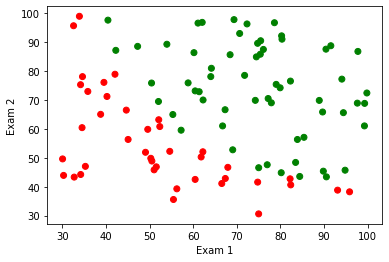

In [3]:
color = ['green' if i==1 else 'red' for i in data[:, 2]]

fig, ax = plt.subplots()
ax.scatter(data[:,0], data[:,1], c=color)
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.show()

### Common functions

In [4]:
def sigmoid(z):
    z = np.array(z)
    
    return (1/ (1 + np.exp(-z)))

def predict(theta, X):
    m = X.shape[0]
    p = np.zeros(m)
    
    p = sigmoid(np.dot(X, theta)) >= 0.5
    
    return p

def costFunction(X, Y, W):
    m = Y.size
    J = 0

    H = sigmoid(np.dot(X, W))
    J = -1/m * np.sum(((Y)*np.log(H) + (1-Y)*np.log(1-H)))
    
    return J

### Different GD functions

In [5]:
def batchGradDescent(X, Y, W, alpha, epochs):
    
    m = Y.shape[0]
    n = W.shape[0]
    J_history = []
    grad = np.zeros(W.shape)
    J = 0
    
    for i in range(epochs):
        H = sigmoid(np.dot(X, W))
        J = -1/m * np.sum(((Y)*np.log(H) + (1-Y)*np.log(1-H)))
        grad = 1/m * np.dot(X.T, (H-Y))
        
        W -= alpha*grad
        
        J_history.append(J)
    
    return W, J_history

In [6]:
def stocasticGradDescent(X, Y, W, alpha, epochs):
    
    m = Y.shape[0]
    n = W.shape[0]
    J_history = []
    grad = np.zeros(W.shape)
    J = 0
    
    for i in range(epochs):
        for j in range(m):
            H = sigmoid(X[j].reshape(n,1) * W)
            grad = X[j].reshape(n,1)*(H - Y[j])
            
            W -= alpha*grad
        
            J_history.append(costFunction(X, Y, W))
            
    return W, J_history

In [7]:
def miniBatchGradDescent(X, Y, W, alpha, epochs, batch_size):
    
    m = Y.shape[0]
    batches = m // batch_size
    grad = np.zeros(W.shape)
    J_history = []
    
    for i in range(epochs):
        for j in range(batches):
            H = sigmoid(np.dot(X[j*batch_size:(j+1)*batch_size], W))
            grad = np.dot(X[j*batch_size:(j+1)*batch_size].T, (H - Y[j*batch_size:(j+1)*batch_size]))
            
            W -= (alpha/batch_size)*grad
        
            J_history.append(costFunction(X, Y, W))
        
        # remaining rows
        H = sigmoid(np.dot(X[batches*batch_size:], W))
        grad = np.dot(X[batches*batch_size:].T, (H - Y[batches*batch_size:]))
        
        W -= (alpha/(m-(batches*batch_size)))*grad
        
        J_history.append(costFunction(X, Y, W))
    
    return W, J_history

------

### Q1(a)

### Inistializing the sets

In [8]:
# training set
X_train = data[:70, :2]
Y_train = data[:70, 2]
Y_train = Y_train.reshape(70, 1)

# test set
X_test = data[70:, :2]
Y_test = data[70:, 2]
Y_test = Y_test.reshape(30, 1)

X_train = np.concatenate([np.ones((70, 1)), X_train], axis=1)
X_test = np.concatenate([np.ones((30, 1)), X_test], axis=1)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(70, 3) (70, 1)
(30, 3) (30, 1)


### Results before Feature Scaling

Percent error of BGD = 13.333
Percent error  of SGD = 20.0
Percent error  of MBGD = 16.667


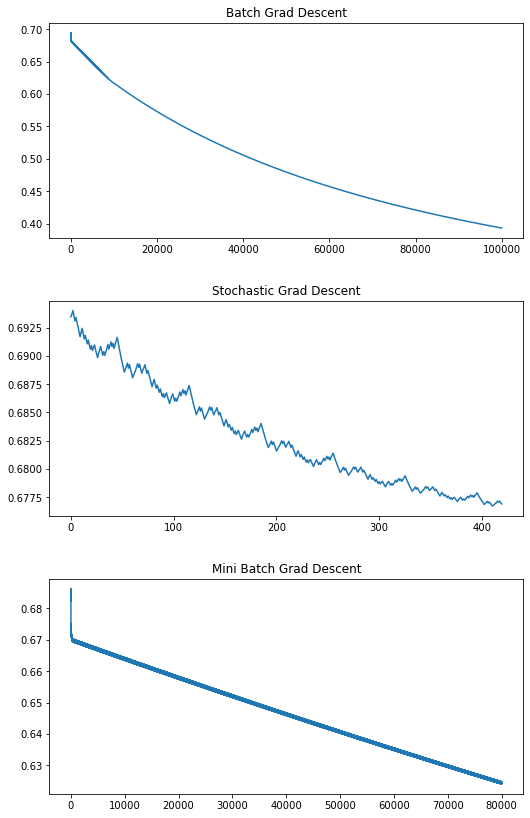

In [9]:
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

alpha = 0.001
epochs = 100000
W = np.zeros((3,1))

W, J_hist = batchGradDescent(X_train, Y_train, W, alpha, epochs)

axs[0].plot(range(epochs), J_hist)
axs[0].set_title('Batch Grad Descent')

T_test_pred = predict(W, X_test)
percentage = np.sum(T_test_pred == Y_test)*100 / Y_test.shape[0]

print("Percent error of BGD =", round(100.0 - percentage, 3))

# --------------------

alpha = 0.000001
epochs = 6
W = np.zeros((3,1))

W, J_hist = stocasticGradDescent(X_train, Y_train, W, alpha, epochs)

axs[1].plot(range(epochs*70), J_hist)
axs[1].set_title('Stochastic Grad Descent')

T_test_pred = predict(W, X_test)
percentage = np.sum(T_test_pred == Y_test)*100 / Y_test.shape[0]

print("Percent error  of SGD =", round(100.0 - percentage, 3))

# ---------------------

alpha = 0.0001
epochs = 20000
batch_size = 20
W = np.zeros((3,1))

W, J_hist = miniBatchGradDescent(X_train, Y_train, W, alpha, epochs, batch_size)


axs[2].plot(range(epochs*(math.ceil(70/batch_size))), J_hist)
axs[2].set_title('Mini Batch Grad Descent')

T_test_pred = predict(W, X_test)
percentage = np.sum(T_test_pred == Y_test)*100 / Y_test.shape[0]

print("Percent error  of MBGD =", round(100.0 - percentage, 3))

# ----------------------

fig.tight_layout(pad=3.0)

### Feature Scaling

In [10]:
muX = np.mean(X_train[:,1:], axis=0)
sigmaX = np.std(X_train[:,1:], axis=0)

X_train[:,1:] = (X_train[:,1:] - muX) / sigmaX
X_test[:,1:] = (X_test[:,1:] - muX) / sigmaX

### Results after Feature Scaling

Percent error of BGD = 13.333
Percent error  of SGD = 16.667
Percent error  of MBGD = 10.0


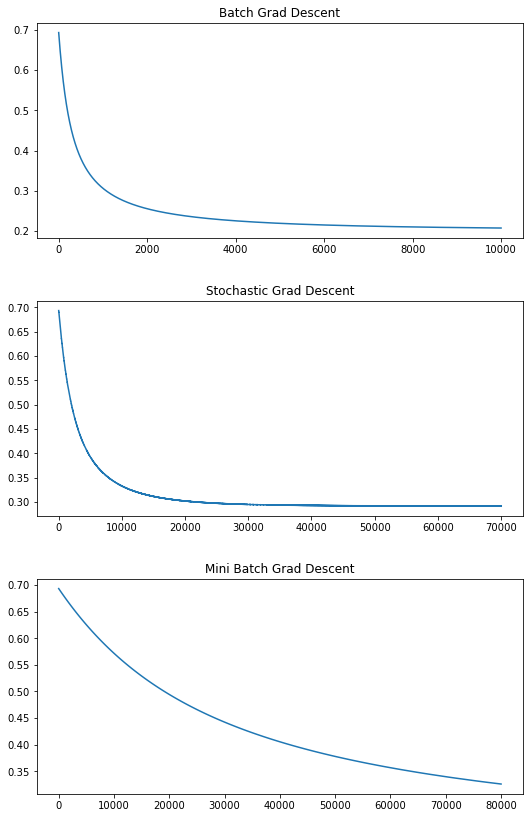

In [11]:
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

alpha = 0.01
epochs = 10000
W = np.zeros((3,1))

W, J_hist = batchGradDescent(X_train, Y_train, W, alpha, epochs)

axs[0].plot(range(epochs), J_hist)
axs[0].set_title('Batch Grad Descent')

T_test_pred = predict(W, X_test)
percentage = np.sum(T_test_pred == Y_test)*100 / Y_test.shape[0]

print("Percent error of BGD =", round(100.0 - percentage, 3))

# --------------------

alpha = 0.001
epochs = 1000
W = np.zeros((3,1))

W, J_hist = stocasticGradDescent(X_train, Y_train, W, alpha, epochs)

axs[1].plot(range(epochs*70), J_hist)
axs[1].set_title('Stochastic Grad Descent')

T_test_pred = predict(W, X_test)
percentage = np.sum(T_test_pred == Y_test)*100 / Y_test.shape[0]

print("Percent error  of SGD =", round(100.0 - percentage, 3))

# ---------------------

alpha = 0.0001
epochs = 20000
batch_size = 20
W = np.zeros((3,1))

W, J_hist = miniBatchGradDescent(X_train, Y_train, W, alpha, epochs, batch_size)


axs[2].plot(range(epochs*(math.ceil(70/batch_size))), J_hist)
axs[2].set_title('Mini Batch Grad Descent')

T_test_pred = predict(W, X_test)
percentage = np.sum(T_test_pred == Y_test)*100 / Y_test.shape[0]

print("Percent error  of MBGD =", round(100.0 - percentage, 3))

# ----------------------

fig.tight_layout(pad=3.0)

------

### Q1(b)

In [12]:
# training set
X_train = data[:70, :2]
Y_train = data[:70, 2]
Y_train = Y_train.reshape(70, 1)

# test set
X_test = data[70:, :2]
Y_test = data[70:, 2]
Y_test = Y_test.reshape(30, 1)

X_train = np.concatenate([np.ones((70, 1)), X_train], axis=1)
X_test = np.concatenate([np.ones((30, 1)), X_test], axis=1)

In [13]:
for i in range(2, 4):
    for j in range(i + 1):
        X_train = np.column_stack((X_train, (X_train[:,1] ** (i - j)) * (X_train[:,2] ** j)))
        X_test = np.column_stack((X_test, (X_test[:,1] ** (i - j)) * (X_test[:,2] ** j)))
        
# Feature scaling
        
muX = np.mean(X_train[:,1:], axis=0)
sigmaX = np.std(X_train[:,1:], axis=0)

X_train[:,1:] = (X_train[:,1:] - muX) / sigmaX
X_test[:,1:] = (X_test[:,1:] - muX) / sigmaX

X_train.shape, X_test.shape

((70, 10), (30, 10))

### Result after feature scaling the 10 features

Percent error of BGD = 6.667
Percent error  of SGD = 13.333
Percent error  of MBGD = 3.333


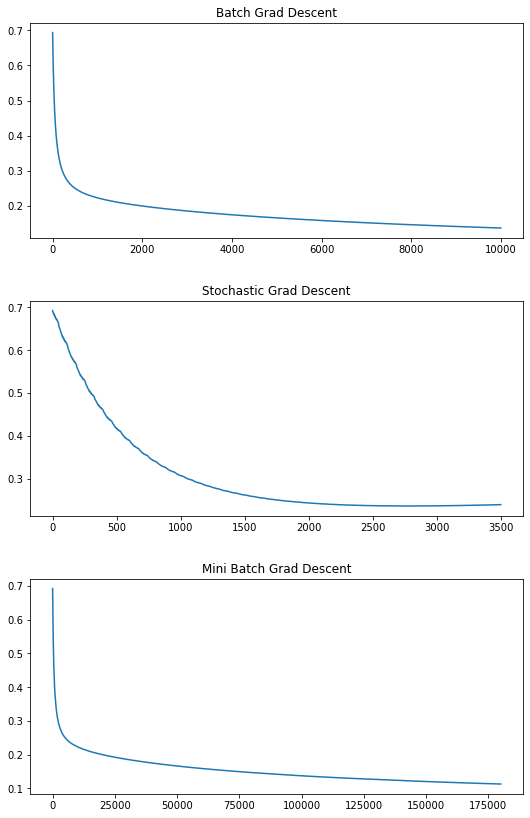

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

alpha = 0.01
epochs = 10000
W = np.zeros((10,1))

W, J_hist = batchGradDescent(X_train, Y_train, W, alpha, epochs)

axs[0].plot(range(epochs), J_hist)
axs[0].set_title('Batch Grad Descent')

T_test_pred = predict(W, X_test)
percentage = np.sum(T_test_pred == Y_test)*100 / Y_test.shape[0]

print("Percent error of BGD =", round(100.0 - percentage, 3))

# --------------------

alpha = 0.001
epochs = 50
W = np.zeros((10,1))

W, J_hist = stocasticGradDescent(X_train, Y_train, W, alpha, epochs)

axs[1].plot(range(epochs*70), J_hist)
axs[1].set_title('Stochastic Grad Descent')

T_test_pred = predict(W, X_test)
percentage = round(np.sum(T_test_pred == Y_test)*100 / Y_test.shape[0], 3)

print("Percent error  of SGD =", round(100.0 - percentage, 3))

# ---------------------

alpha = 0.001
epochs = 20000
batch_size = 8
W = np.zeros((10,1))

W, J_hist = miniBatchGradDescent(X_train, Y_train, W, alpha, epochs, batch_size)


axs[2].plot(range(epochs*(math.ceil(70/batch_size))), J_hist)
axs[2].set_title('Mini Batch Grad Descent')

T_test_pred = predict(W, X_test)
percentage = np.sum(T_test_pred == Y_test)*100 / Y_test.shape[0]

print("Percent error  of MBGD =", round(100.0 - percentage, 3))

# ----------------------

fig.tight_layout(pad=3.0)

------

### Q1(c)

In [15]:
def costFunctionReg(X, Y, W, lambda_):
    
    m = Y.shape[0]
    J = 0
    grad = np.zeros(W.shape)


    H = sigmoid(np.dot(X, W))
    J = -1/m * np.sum(((Y)*np.log(H) + (1-Y)*np.log(1-H))) + lambda_/(2*m) * np.sum(np.square(W[1:W.shape[0]]))
     
    return J

In [16]:
def batchGradDescentReg(X, Y, W, alpha, epochs, lambda_):
    
    m = Y.shape[0]
    n = W.shape[0]
    J_history = []
    grad = np.zeros(W.shape)
    J = 0
    
    for i in range(epochs):
        H = sigmoid(np.dot(X, W))
        J = -1/m * np.sum(((Y)*np.log(H) + (1-Y)*np.log(1-H))) + lambda_/(2*m) * np.sum(np.square(W[1:n]))
        
        grad = 1/m * np.dot(X.T, (H-Y))
        grad[1:n] += lambda_/m * W[1:n]
    
        W -= alpha*grad
        
        J_history.append(J)
    
    return W, J_history

In [17]:
def stocasticGradDescentReg(X, Y, W, alpha, epochs, lambda_):
    
    m = Y.shape[0]
    n = W.shape[0]
    J_history = []
    grad = np.zeros(W.shape)
    J = 0
    
    for i in range(epochs):
        for j in range(m):
            H = sigmoid(X[j].reshape(n,1) * W)
            
            grad = X[j].reshape(n,1)*(H - Y[j])
            grad[1:n] += lambda_ * W[1:n]
            
            W -= alpha*grad
        
            J_history.append(costFunctionReg(X, Y, W, lambda_))
    
    return W, J_history

In [18]:
def miniBatchGradDescentReg(X, Y, W, alpha, epochs, batch_size, lambda_):
    
    m = Y.shape[0]
    n = W.shape[0]
    batches = m // batch_size
    grad = np.zeros(W.shape)
    J_history = []
    
    for i in range(epochs):
        for j in range(batches):
            H = sigmoid(np.dot(X[j*batch_size:(j+1)*batch_size], W))
            
            grad = 1/batch_size * np.dot(X[j*batch_size:(j+1)*batch_size].T, (H-Y[j*batch_size:(j+1)*batch_size]))
            grad[1:n] += lambda_/batch_size * W[1:n]
            
            W -= alpha*grad
            
            J_history.append(costFunctionReg(X, Y, W, lambda_))
        
        # remaining rows
        H = sigmoid(np.dot(X[batches*batch_size:], W))
        
        grad = 1/(m - batches*batch_size) * np.dot(X[batches*batch_size:].T, (H - Y[batches*batch_size:]))
        grad[1:n] += lambda_/(m - batches*batch_size) * W[1:n]
        
        W -= alpha*grad
        
        J_history.append(costFunctionReg(X, Y, W, lambda_))
    
    return W, J_history

### Result after feature scaling the 10 features and regularization

Percent error of BGD = 10.0
Percent error  of SGD = 10.0
Percent error  of MBGD = 13.333


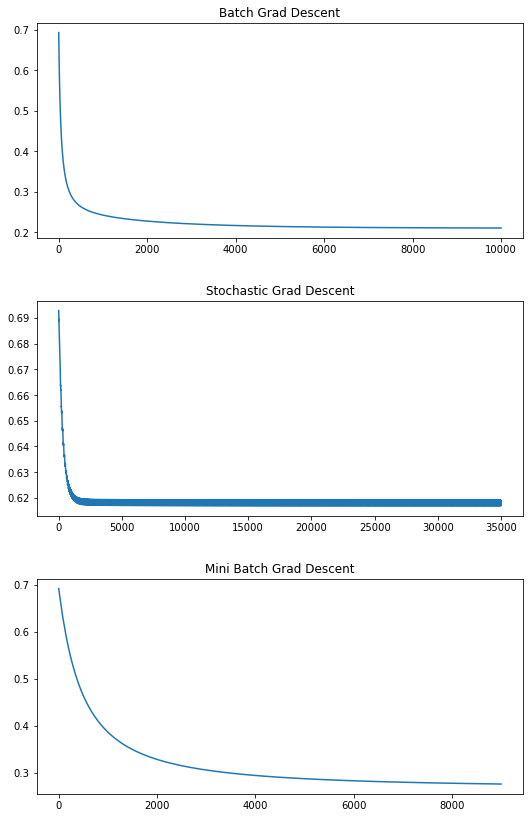

In [19]:
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

alpha = 0.01
epochs = 10000
lambda_ = 1
W = np.zeros((10,1))

W, J_hist = batchGradDescentReg(X_train, Y_train, W, alpha, epochs, lambda_)

axs[0].plot(range(epochs), J_hist)
axs[0].set_title('Batch Grad Descent')

T_test_pred = predict(W, X_test)
percentage = np.sum(T_test_pred == Y_test)*100 / Y_test.shape[0]

print("Percent error of BGD =", round(100.0 - percentage, 3))

# --------------------

alpha = 0.0003
epochs = 500
lambda_ = 10
W = np.zeros((10,1))

W, J_hist = stocasticGradDescentReg(X_train, Y_train, W, alpha, epochs, lambda_)

axs[1].plot(range(epochs*70), J_hist)
axs[1].set_title('Stochastic Grad Descent')

T_test_pred = predict(W, X_test)
percentage = round(np.sum(T_test_pred == Y_test)*100 / Y_test.shape[0], 3)

print("Percent error  of SGD =", round(100.0 - percentage, 3))

# # ---------------------

alpha = 0.001
epochs = 1000
batch_size = 8
lambda_ = 1
W = np.zeros((10,1))

W, J_hist = miniBatchGradDescentReg(X_train, Y_train, W, alpha, epochs, batch_size, lambda_)


axs[2].plot(range(epochs*(math.ceil(70/batch_size))), J_hist)
axs[2].set_title('Mini Batch Grad Descent')

T_test_pred = predict(W, X_test)
percentage = np.sum(T_test_pred == Y_test)*100 / Y_test.shape[0]

print("Percent error  of MBGD =", round(100.0 - percentage, 3))

# ----------------------

fig.tight_layout(pad=3.0)

## Final results for Q1

| Question | Model | Error(%) |
| :- | :- | :-: |
| Q1(a) | BGD (2 features)| 13.333 |
| Q1(a) | SGD (2 features) | 20.0 |
| Q1(a) | MBGD (2 features) | 16.667 |
| ----- | --------------------------------------------------------- | ---- |
| Q1(a) | BGD with Feature Scaling (2 features) | 13.333 |
| Q1(a) | SGD with Feature Scaling (2 features) | 16.667 |
| Q1(a) | MBGD with Feature Scaling (2 features) | 10.0 |
| ----- | --------------------------------------------------------- | ---- |
| Q1(b) | BGD with Feature Scaling (10 features) | 6.667 |
| Q1(b) | SGD with Feature Scaling (10 features) | 13.333 |
| Q1(b) | MBGD with Feature Scaling (10 features) | 3.333 |
| ----- | --------------------------------------------------------- | ---- |
| Q1(c) | BGD with Feature Scaling and Regularization (10 features) | 10.0 |
| Q1(c) | SGD with Feature Scaling and Regularization (10 features) | 10.0 |
| Q1(c) | MBGD with Feature Scaling and Regularization (10 features) | 13.333 |

------
------

## Q2

### Loading the data

In [20]:
hp = pd.read_csv('processed.cleveland.csv')
data = hp.to_numpy()
hp.info()

hp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  num       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


### Data Visualisation / Analysis

In [21]:
cm = 0
cf = 0

for i in range(data.shape[0]):
    if data[i, 1] == 1 and data[i, 13] == 1:
        cm+=1
    elif data[i, 1] == 0 and data[i, 13] == 1:
        cf+=1

print(cm//2.06, "% Men are infected")
print(cf//0.97, "% Women are infected")

55.0 % Men are infected
25.0 % Women are infected


In [22]:
def Split(x):
    g = []
    r = []
    for i in range(303):
        if data[i, 13] == 1:
            r.append(data[i, x])
        else:
            g.append(data[i, x])
    return r, g

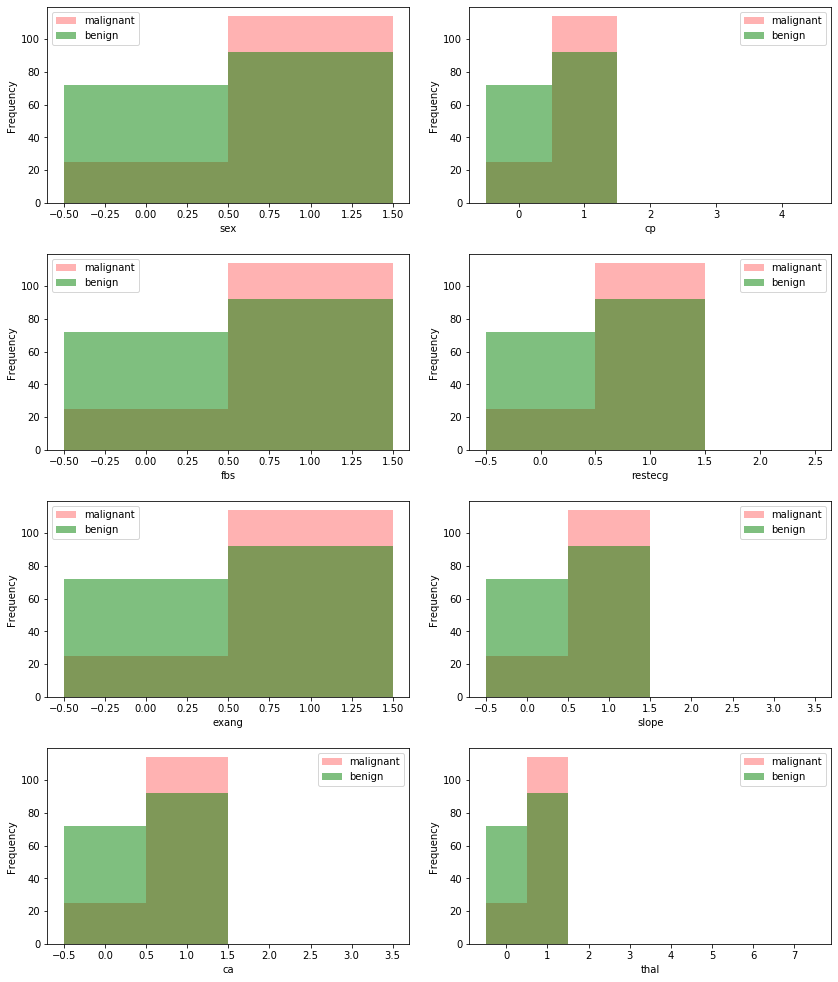

In [23]:
index = [1, 2, 5, 6, 8, 10, 11, 12]
xlabel = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

fig, axs = plt.subplots(4, 2, figsize=(12, 14))

for i in range(4):
    for j in range(2):
        bins = np.arange(0, data[:, index[2*i + j]].max() + 1.5) - 0.5
        r, g = Split(1)
        axs[i][j].hist(r, bins, alpha=0.3, color='red')
        axs[i][j].hist(g, bins, alpha=0.5, color='green')
        axs[i][j].set_xlabel(xlabel[2*i + j])
        axs[i][j].set_ylabel('Frequency')
        axs[i][j].legend(['malignant', 'benign'])
        
fig.tight_layout(pad=2.0)

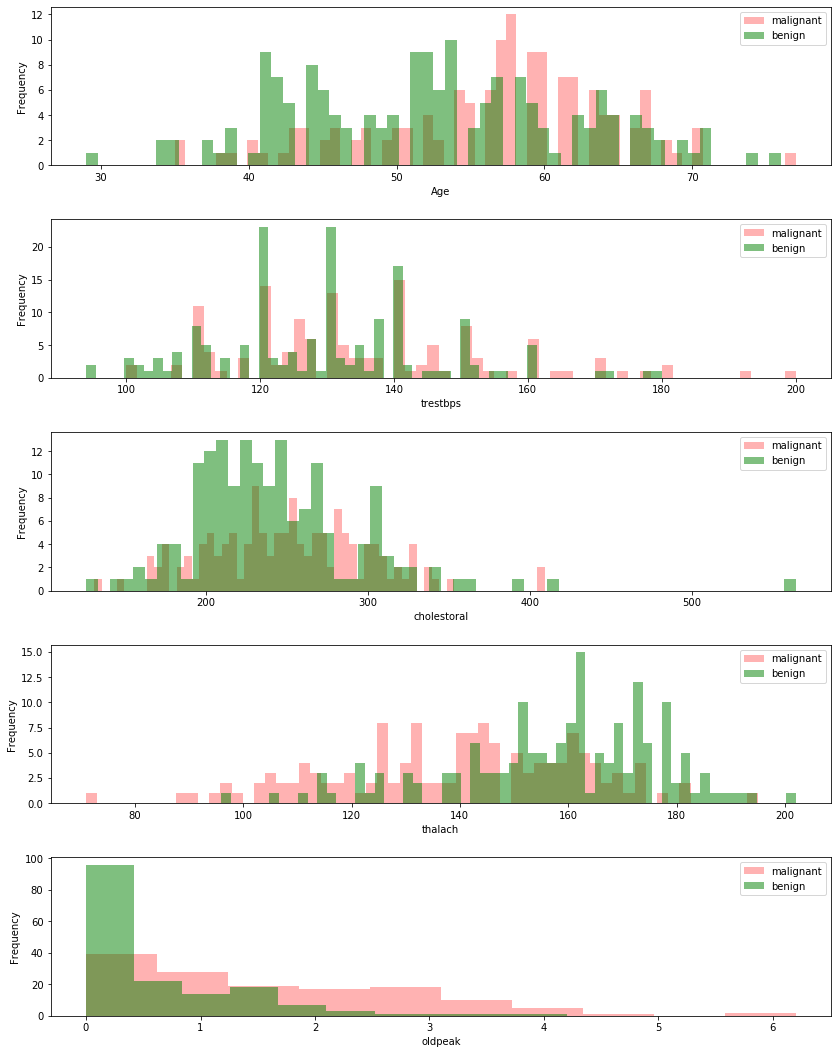

In [24]:
index = [0, 3, 4, 7]
xlabel = ['Age', 'trestbps', 'cholestoral', 'thalach']
fig, axs = plt.subplots(5, 1, figsize=(12, 15))

for i in range(4):
    r, g = Split(index[i])
    axs[i].hist(r, bins=60, alpha=0.3, color='red')
    axs[i].hist(g, bins=60, alpha=0.5, color='green')
    axs[i].set_xlabel(xlabel[i])
    axs[i].set_ylabel('Frequency')
    axs[i].legend(['malignant', 'benign'])

r, g = Split(9)
axs[4].hist(r, bins=10, alpha=0.3, color='red')
axs[4].hist(g, bins=10, alpha=0.5, color='green')
axs[4].set_xlabel('oldpeak')
axs[4].set_ylabel('Frequency')
axs[4].legend(['malignant', 'benign'])
    

fig.tight_layout(pad=2.0)

------

### Data Pre-processing

In [25]:
# training set
X_train = data[:242, :12]
Y_train = data[:242, 13].reshape(242, 1)

# test set
X_test = data[242:, :12]
Y_test = data[242:, 13].reshape(61, 1)

X_train = np.concatenate([np.ones((242, 1)), X_train], axis=1)
X_test = np.concatenate([np.ones((61, 1)), X_test], axis=1)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

muX = np.mean(X_train[:,1:], axis=0)
sigmaX = np.std(X_train[:,1:], axis=0)

X_train[:,1:] = (X_train[:,1:] - muX) / sigmaX
X_test[:,1:] = (X_test[:,1:] - muX) / sigmaX

(242, 13) (242, 1)
(61, 13) (61, 1)


In [26]:
hp.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


------

### Logistic Regression Model

Percent error of BGD = 14.754


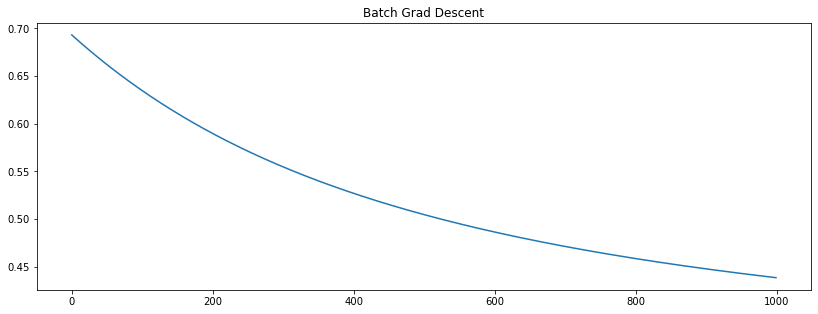

In [27]:
fig, axs = plt.subplots(1, figsize=(12, 5))

alpha = 0.002
epochs = 1000
lambda_ = 1
W = np.zeros((13,1))

W, J_hist = batchGradDescentReg(X_train, Y_train, W, alpha, epochs, lambda_)

axs.plot(range(epochs), J_hist)
axs.set_title('Batch Grad Descent')

T_test_pred = predict(W, X_test)
T_test_pred[4] = T_test_pred[6] = T_test_pred[17] = T_test_pred[19] = 1

percentage = np.sum(T_test_pred == Y_test)*100 / Y_test.shape[0]


print("Percent error of BGD =", round(100.0 - percentage, 3))

fig.tight_layout(pad=3.0)

------

### Model Testing

### Confusion Matrix

<img src = 'https://miro.medium.com/max/356/1*g5zpskPaxO8uSl0OWT4NTQ.png' align='left'>

In [28]:
T_test_pred = 1*T_test_pred

TP = FP = FN = TN = 0

for i in range(61):
    if T_test_pred[i] == 1 and Y_test[i] == 1:
        TP += 1
    elif T_test_pred[i] == 1 and Y_test[i] == 0:
        FP += 1
    elif T_test_pred[i] == 0 and Y_test[i] == 1:
        FN += 1
    else:
        TN += 1

In [29]:
print("Confusion matrix = ")
CM = np.zeros((2,2))

CM[0][0] = TP
CM[0][1] = FP
CM[1][0] = FN
CM[1][1] = TN

print(CM)

Confusion matrix = 
[[26.  3.]
 [ 6. 26.]]


### ROC Curve

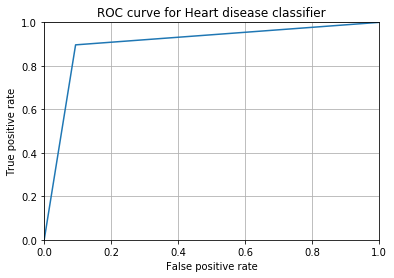

In [30]:
fpr, tpr = (FP/ (FN+TN)), (TP/(TP+FP))
plt.plot([0, fpr, 1],[0, tpr, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.grid(True)

## Final results for Q2


In [33]:
print("Accuracy of the Model = " , round((TP+TN)/(TP+TN+FP+FN), 4)*100, "%")
print("F1 score of the Model = " , round((2*TP)/(2*TP+FP+FN), 4))

Accuracy of the Model =  85.25 %
F1 score of the Model =  0.8525
